<a href="https://colab.research.google.com/github/DouglasDiasEng/Image-Extension-GAN/blob/main/Image_Extension_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

image = Image.open('/content/boina.jpeg')


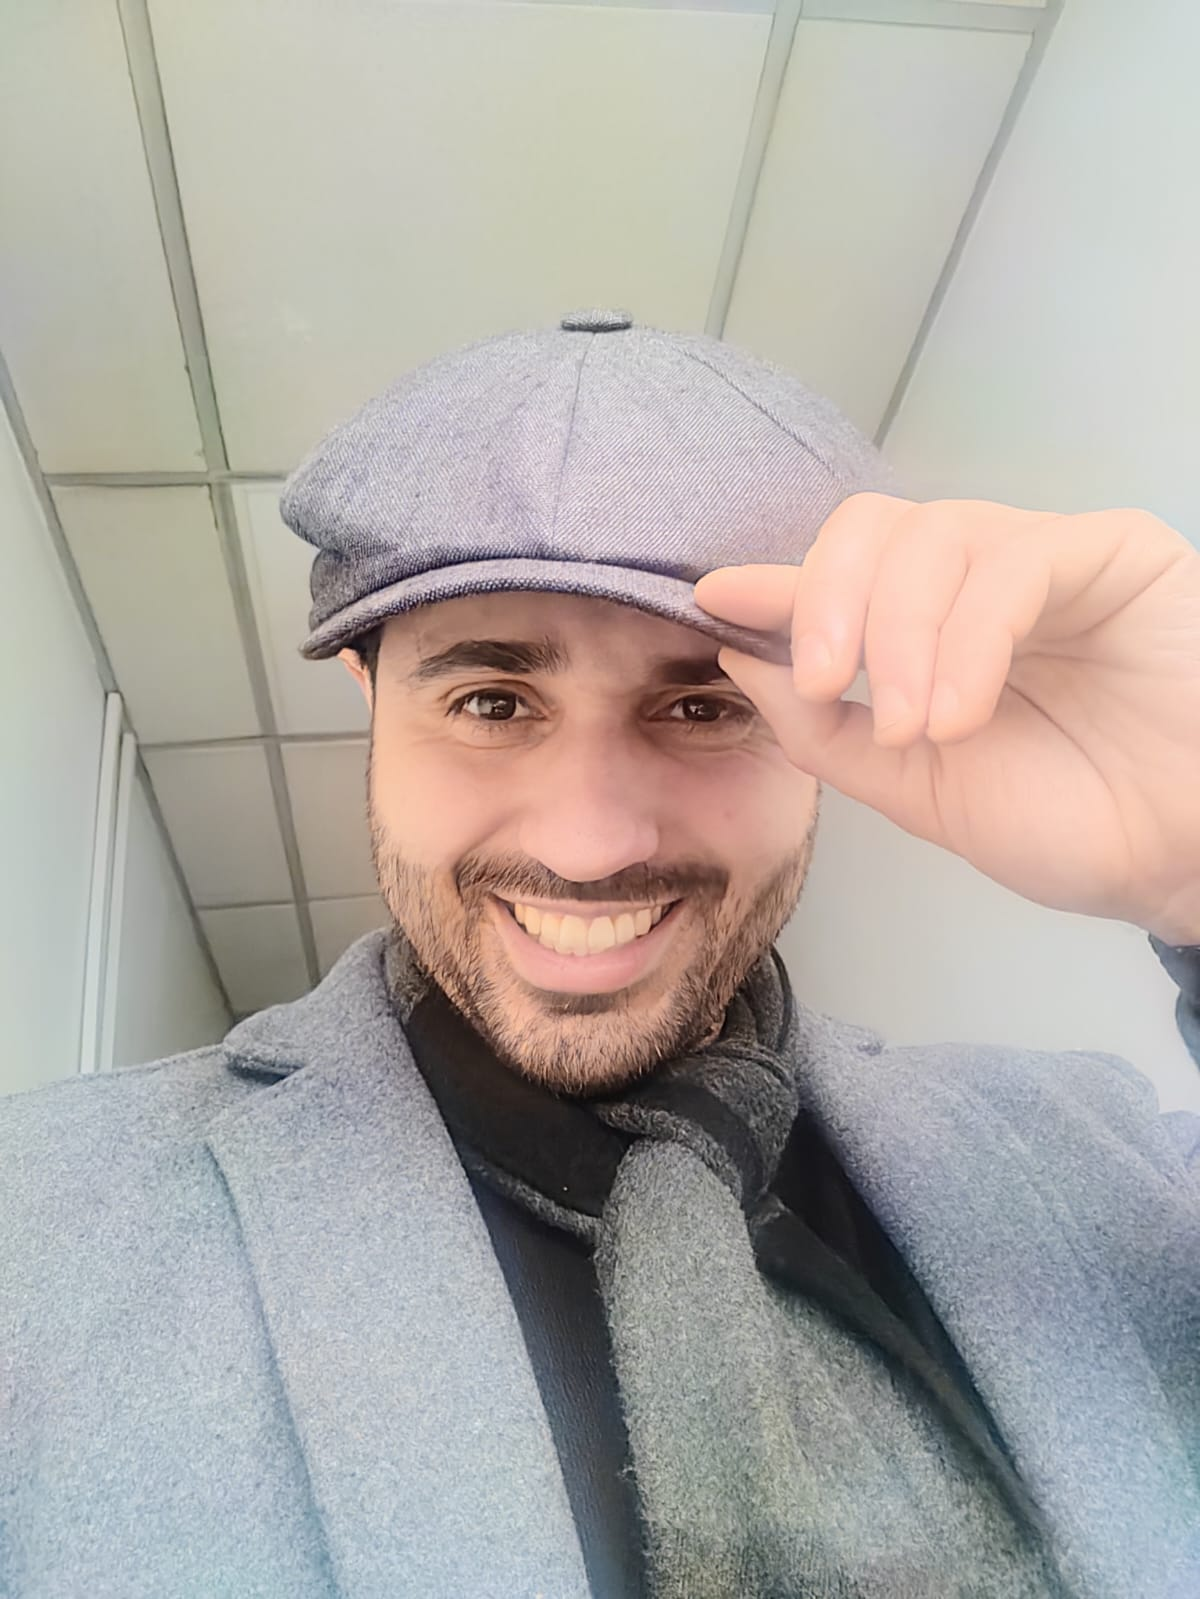

In [3]:
image

In [4]:
image.size

(1200, 1599)

In [5]:
width, height = image.size
print(width, height)

1200 1599


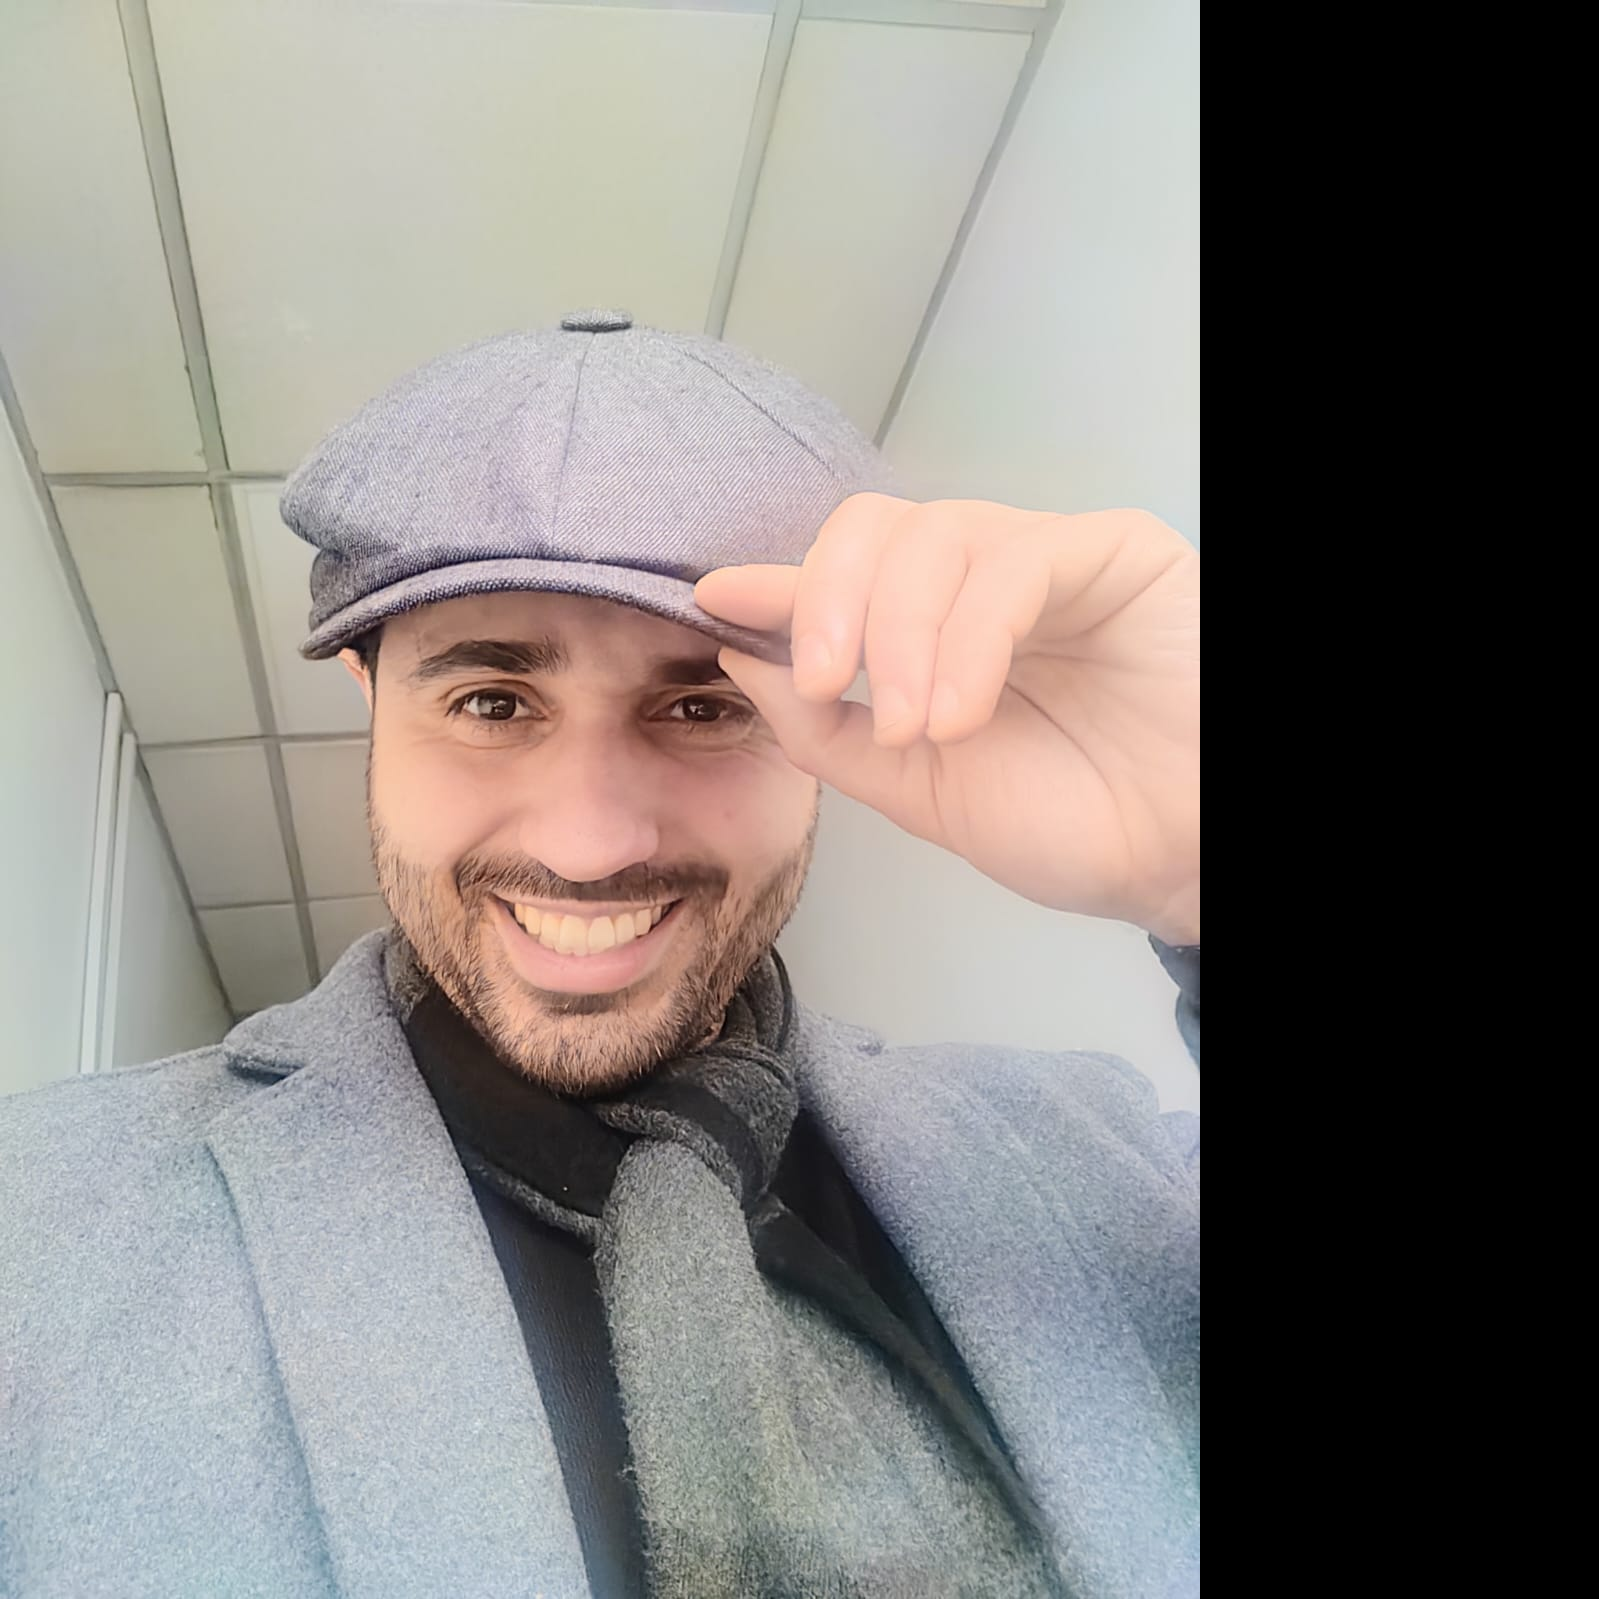

In [6]:
image = image.crop((0, 0, height, height))
image

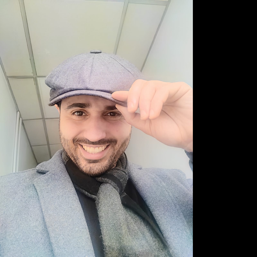

In [7]:
image = image.resize((257, 257))
image

In [8]:
image.size

(257, 257)

In [9]:
type(image)

PIL.Image.Image

In [10]:
image = np.array(image)


In [11]:
type(image)

numpy.ndarray

array([[[188, 197, 180],
        [189, 198, 181],
        [189, 197, 180],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[188, 197, 180],
        [189, 198, 181],
        [189, 198, 181],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[189, 197, 180],
        [189, 198, 181],
        [189, 198, 181],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[137, 162, 176],
        [155, 176, 191],
        [165, 184, 198],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[135, 163, 177],
        [151, 175, 188],
        [156, 178, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[160, 182, 195],
        [152, 174, 189],
        [152, 173, 189],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
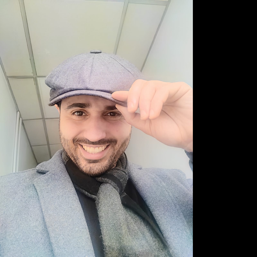

In [12]:
image

In [13]:
image.shape

(257, 257, 3)

In [14]:
image = np.expand_dims(image.astype(np.float32) / 255., axis = 0)

In [15]:
image.shape

(1, 257, 257, 3)

In [16]:
image

array([[[[0.7372549 , 0.77254903, 0.7058824 ],
         [0.7411765 , 0.7764706 , 0.70980394],
         [0.7411765 , 0.77254903, 0.7058824 ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.7372549 , 0.77254903, 0.7058824 ],
         [0.7411765 , 0.7764706 , 0.70980394],
         [0.7411765 , 0.7764706 , 0.70980394],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.7411765 , 0.77254903, 0.7058824 ],
         [0.7411765 , 0.7764706 , 0.70980394],
         [0.7411765 , 0.7764706 , 0.70980394],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.5372549 , 0.63529414, 0.6901961 ],
         [0.60784316, 0.6901961 , 0.7490196 ]

In [17]:
model_name = 'Boundless Half' # @param ['Boundless Half', 'Boundless Quarter', 'Boundless Three Quarters']

In [18]:
model_paths = {
    'Boundless Half' : 'https://tfhub.dev/google/boundless/half/1',
    'Boundless Quarter' : 'https://tfhub.dev/google/boundless/quarter/1',
    'Boundless Three Quarters' : 'https://tfhub.dev/google/boundless/three_quarter/1'
}

In [19]:
model_paths = model_paths[model_name]

In [20]:
print('Model: ', model_name)
print('Path: ', model_paths)

Model:  Boundless Half
Path:  https://tfhub.dev/google/boundless/half/1


In [21]:
model = hub.load(model_paths)

In [24]:
result = model.signatures['default'](tf.constant(image))

In [25]:
print(model.signatures.keys())


KeysView(_SignatureMap({'default': <ConcreteFunction (images: TensorSpec(shape=(None, 257, 257, 3), dtype=tf.float32, name='images')) -> Dict[['masked_image', TensorSpec(shape=(None, 257, 257, 3), dtype=tf.float32, name=None)], ['default', TensorSpec(shape=(None, 257, 257, 3), dtype=tf.float32, name=None)]] at 0x7CC6B0EB50A0>}))


In [26]:
result

{'masked_image': <tf.Tensor: shape=(1, 257, 257, 3), dtype=float32, numpy=
 array([[[[0.7372549 , 0.77254903, 0.7058824 ],
          [0.7411765 , 0.7764706 , 0.70980394],
          [0.7411765 , 0.77254903, 0.7058824 ],
          ...,
          [0.5       , 0.5       , 0.5       ],
          [0.5       , 0.5       , 0.5       ],
          [0.5       , 0.5       , 0.5       ]],
 
         [[0.7372549 , 0.77254903, 0.7058824 ],
          [0.7411765 , 0.7764706 , 0.70980394],
          [0.7411765 , 0.7764706 , 0.70980394],
          ...,
          [0.5       , 0.5       , 0.5       ],
          [0.5       , 0.5       , 0.5       ],
          [0.5       , 0.5       , 0.5       ]],
 
         [[0.7411765 , 0.77254903, 0.7058824 ],
          [0.7411765 , 0.7764706 , 0.70980394],
          [0.7411765 , 0.7764706 , 0.70980394],
          ...,
          [0.5       , 0.5       , 0.5       ],
          [0.5       , 0.5       , 0.5       ],
          [0.5       , 0.5       , 0.5       ]],
 
       